# Introduction to Chatbots

## Learning Objectives

By the end of this notebook, you will understand:
* What chatbots are
* How chatbots work, as well as the different types

An exercise is also included at the bottom of the notebook where you can apply what you have learnt to make your own simple chatbot.


## What are chatbots?

If you have used a chatbot before, which you probably have, you'll know that chatbots are a conversational form of AI which are designed to simplify human interaction with computers. Chatbots can have a number of uses, depending on where they can be found:
* Customer service - many businesses use chatbots as a first point of contact when customers require assistance. They can help customers to easily navigate the company website, answer simple questions and direct people to the relevant point of contact.
* E-commerce - chatbots used by retail companies or telecommunication providers can complete transactions or requests with a customer.
* Virtual assistants - personal assistant chatbots such as Siri or Alexa are often used to quickly retrieve information, schedule appointments and use smart home features.



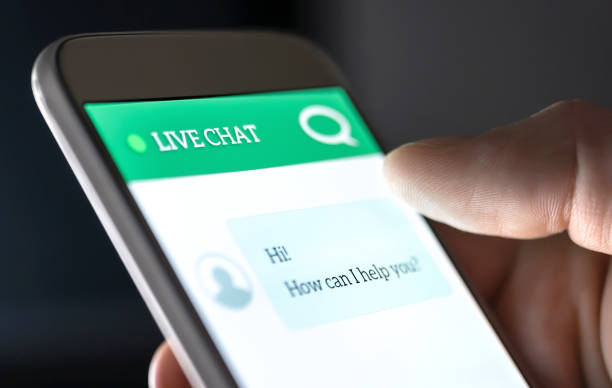

## How do chatbots work?

Before we can understand the basics of how chatbots work, it is important to know that there are two main types:


### Rule-based Chatbots

Rule based chatbots use a flowchart type style to talk to humans rather than using artificial intelligence. The bot will guide the user through a series of questions, with each one often being a follow up of the last question, to reach the resolution. 

Rule based chatbots are as simple or as complicated as the creator makes them, but they can't answer any questions outside of the defined rules, so they can only work with the scenarios they are trained for. This also means that the chatbots can't learn through the interactions they have with users. These chatbots can't capture typos either, so any mistakes the user makes will mean the chatbot will not be able to understand them.




### AI-based chatbots

AI chatbots are much more advanced than rule-based chatbots, as they use Natural Language Processing (NLP) to understand the customer's intent and solve the customer's problem. They can learn and improve from information gathered during interactions, understand patterns of behaviour, have a wider range of decision making skills and can even understand (and speak) many languages.

It can take longer to create and train AI bots initially, but can save a lot of time and money in the long run. 


Both have their benefits and fit different consumer needs, so it would be unfair to suggest that one is better than the other as it depends on what the objectives of the chatbot are. In this notebook we will look into the code for both types.

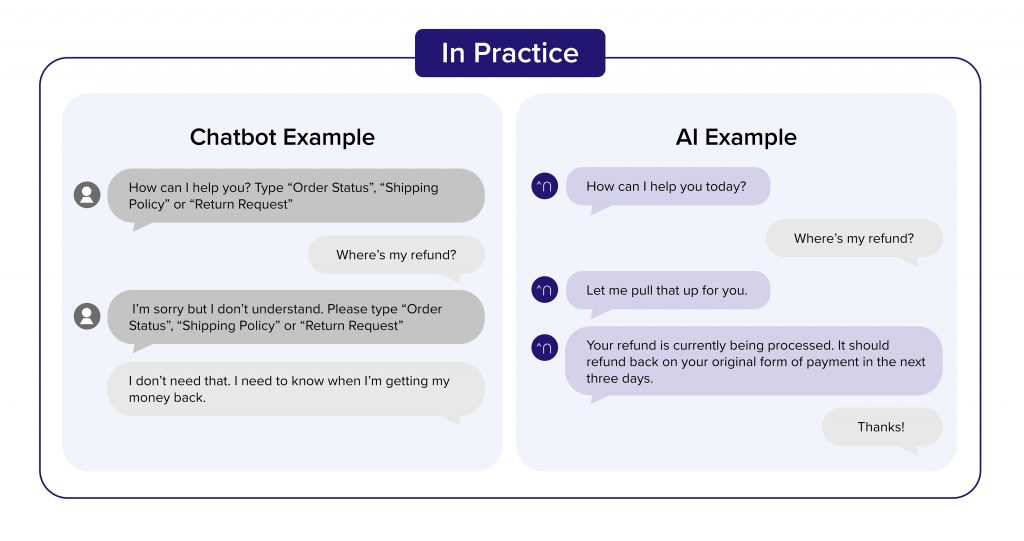

from netomi.com

## Rule-Based Chatbots

Let's create a basic, rule-based chatbot using NLTK. From NLTK we will import `Chat`, which processes the text data the chatbot recieves and finds the useful information out of it. We will also import `reflections`, which is a dictionary containing basic input and the corresponding outputs. You can also create your own dictionary with more responses. If we print reflections, it looks something like this:

In [1]:
#import packages
from nltk.chat.util import Chat, reflections
#show reflections
print(reflections)

{'i am': 'you are', 'i was': 'you were', 'i': 'you', "i'm": 'you are', "i'd": 'you would', "i've": 'you have', "i'll": 'you will', 'my': 'your', 'you are': 'I am', 'you were': 'I was', "you've": 'I have', "you'll": 'I will', 'your': 'my', 'yours': 'mine', 'you': 'me', 'me': 'you'}


In [2]:
#create pairs list

pairs = [
    ['my name is (.*)', ['Hello %1']],
    ['(hi|hello|hey)', ['Hey there!', 'Hello!', 'Hey!']],
    ['(.*) your name?', ['My name is TestBot.']],
    ['(.*) created you?', ["I will never know the answer, it's top secret!"]]
]

You might have noticed that the above cell uses regex, more specifically `(.*)`. For example, taking the first pair in the list `'my name is (.*)'`, this means any number of words and characters can be added after "my name is", and it will be ignored because it is looking for the keywords "my name is". The chatbot will then respond with whatever the user inputted into `(.*)`, as shown by the `%1` syntax.

**Try adding some more pairs to `pairs` before running the next line of code. What else could TestBot say to us?**

In [3]:
#initialise chatbot
chat = Chat(pairs, reflections)
chat.converse()

>hi
Hello!
>my name is jane doe
Hello jane doe
>whats your name
My name is TestBot.
>who created you
I will never know the answer, it's top secret!


KeyboardInterrupt: Interrupted by user

The above cell is still running, so make sure to manually stop the chatbot by interrupting the kernel (click the black square in the top bar). We'll look at how to quit the chatbot with code in the next example.

## AI-based Chatbots

This chatbot creation will be more complicated than the rule based chatbot. At certain points during the next section there are links you can follow to further your knowledge and understanding if needed.

(the following code is adapted from https://www.techwithtim.net/tutorials/ai-chatbot/part-1/)

In [4]:
#import packages
import numpy
import tflearn
import tensorflow
import random
import nltk
from nltk.stem.lancaster import LancasterStemmer
import json

Instructions for updating:
non-resource variables are not supported in the long term


Our data will be held in a file called `intents.json`. For the purpose of this notebook we will use a file which can be found [here](https://github.com/vishalstark512/ChatBot_With_Intents/blob/master/intents.json), but there are many different `intents.json` files on the internet you could use instead.
With this data, we will use a neural network to take a sentence of words and classify it according to one of the tags in this file.

In [6]:
#load in data
with open('intents.json') as file:
    data = json.load(file)

In [7]:
#creating blank lists to store unique values in intents.json
words = []
labels = []
docs_x = []
docs_y = []

In [8]:
#loop through data and extract the values we need
for intent in data['intents']:
    for pattern in intent['patterns']:
        wrds = nltk.word_tokenize(pattern) #turn each pattern into a list of words
        words.extend(wrds)
        docs_x.append(wrds) #add each pattern into this list
        docs_y.append(intent["tag"]) #add each corresponding tag to this list
        
    if intent['tag'] not in labels:
        labels.append(intent['tag'])

Next, we need to stem our list of words to reduce the vocabulary which will help to find the more general meaning behind sentences.

**Recap**:
Stemming refers to removing the suffix of a word and returning it to its base word. For example, *waiting*, *waits* and waited would all return to *wait*.

In [9]:
#stemming
stemmer = LancasterStemmer()
words = [stemmer.stem(w.lower()) for w in words if w != "?"]
words = sorted(list(set(words)))

labels = sorted(labels)

Next, we need to create a bag of words. We need to represent each sentence with a list that is the same length as the amount of words in our model's vocabulary. Each position in the list represents a word from our vocabulary. If the position in the list is 1, then the word is present in the sentence, if it is 0 then the word isn't present.


If you'd like to know more about bag of words before progressing, have a read of [this article.](https://www.mygreatlearning.com/blog/bag-of-words/)

In [10]:
training = []
output = []

out_empty = [0 for _ in range(len(labels))]
#creating a bag of words
for x, doc in enumerate(docs_x):
    bag = []

    wrds = [stemmer.stem(w.lower()) for w in doc]

    for w in words:
        if w in wrds:
            bag.append(1)
        else:
            bag.append(0)
            
    #formatting output - create output lists that are the same length as the amount of labels in the dataset
    output_row = out_empty[:]
    output_row[labels.index(docs_y[x])] = 1

    training.append(bag)
    output.append(output_row)

In [11]:
#convert training data and output to numpy arrays.
training = numpy.array(training)
output = numpy.array(output)

We are now ready to start building and training our model. If you need to read further into machine learning and neural networks, take a look at [this article](https://adeshpande3.github.io/How-I-Used-Deep-Learning-to-Train-a-Chatbot-to-Talk-Like-Me) before continuing.

In [12]:
#defining the architecture of our model
tensorflow.compat.v1.reset_default_graph()

net = tflearn.input_data(shape=[None, len(training[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(output[0]), activation="softmax")
net = tflearn.regression(net)

model = tflearn.DNN(net)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Some of the values in the cell above can be changed to make an even better model. Once you've completed this notebook, feel free to come back and play around with the values to see what you can do.**

We can now train our model on our data, using a feed-forward neural network with two hidden layers. In the below code, the number of epochs refers to the number of times that the model sees the information while running.

In [13]:
#fit model to data - this cell may take a minute to run
model.fit(training, output, n_epoch=1000, batch_size=8, show_metric=True)
model.save("model.tflearn")

Training Step: 8999  | total loss: 0.03630 | time: 0.050s
| Adam | epoch: 1000 | loss: 0.03630 - acc: 0.9760 -- iter: 64/67
Training Step: 9000  | total loss: 0.03281 | time: 0.055s
| Adam | epoch: 1000 | loss: 0.03281 - acc: 0.9784 -- iter: 67/67
--
INFO:tensorflow:/Users/georginadangerfield/git-repos/trainee-lecturer-jan-22/model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


Finally, we need to make predictions with our model. Our aim is to generate a response to anything and everything that the user types in, so to do this we will need to take the input from the user, convert input from a string to a bag of words, get a prediction from the model, find the most probable class and then randomly pick a response from that class.

In [17]:
def bag_of_words(s, words):
    """
    Convert user input to a bag of words
    """
    bag = [0 for _ in range(len(words))]

    s_words = nltk.word_tokenize(s)
    s_words = [stemmer.stem(word.lower()) for word in s_words]

    for se in s_words:
        for i, w in enumerate(words):
            if w == se:
                bag[i] = 1
            
    return numpy.array(bag)


def chat():
    """
    Gets prediction from model and outputs response from JSON file of responses.
    """
    print("Hello, my name is Friday! Let's chat! (type Q to stop)")
    while True:
        inp = input("You: ")
        if inp.lower() == "q":
            print("See you soon, thanks for coming by!")
            break

        results = model.predict([bag_of_words(inp, words)])
        results_index = numpy.argmax(results)
        tag = labels[results_index]

        for tg in data["intents"]:
            if tg['tag'] == tag:
                responses = tg['responses']

        print(random.choice(responses))

That's it! Running the cell below will start the chatbot.

In [18]:
chat()

Hello, my name is Friday! Let's chat! (type Q to stop)
You: hello
Hi there, how can I help?
You: who are you?
Hi I'm Friday and I'm an AI created for chatting with humans
You: what can you do
Right now I'm in developing stage. As soon I'm developed, I can do everything!
You: do you know me?
You are a dumb person asking a machine about yourself
You: can you make me laugh?
How do you make holy water? you boil the hell out of it
You: thanks
Happy to help!
You: bye
Bye! Come back again soon.
You: q
See you soon, thanks for coming by!


Congratulations, you've created two chatbots! Have a go at the exercise below if you feel ready.

## Exercise

Create a chatbot that can give first aid recommendations. You can use either one of the chatbots we've created, but you may have to do a little more manual work for the rule-based chatbot. If you like, you can use the `exercise_intents.json` file (taken from [Kaggle](https://www.kaggle.com/therealsampat/first-aid-recommendation-deep-learning-chatbot/data)).